<a href="https://colab.research.google.com/github/aayushikarcbit/DataScience_CoderCave/blob/main/Phase_1_EDA_on_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Analysis on Terrorism
##Import libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##Load and explore the dataset


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")

In [ ]:
# Display the last few rows of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
#Cheching the null values

df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [ ]:
df.shape

(181691, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
df.describe

<bound method NDFrame.describe of         Year  Month  Day             Country            state  \
0       1970      7    2  Dominican Republic              NaN   
1       1970      0    0              Mexico          Federal   
2       1970      1    0         Philippines           Tarlac   
3       1970      1    0              Greece           Attica   
4       1970      1    0               Japan          Fukouka   
...      ...    ...  ...                 ...              ...   
181686  2017     12   31             Somalia  Middle Shebelle   
181687  2017     12   31               Syria         Lattakia   
181688  2017     12   31         Philippines      Maguindanao   
181689  2017     12   31               India          Manipur   
181690  2017     12   31         Philippines      Maguindanao   

                             Region           city   latitude   longitude  \
0       Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                     North Ame

In [ ]:
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

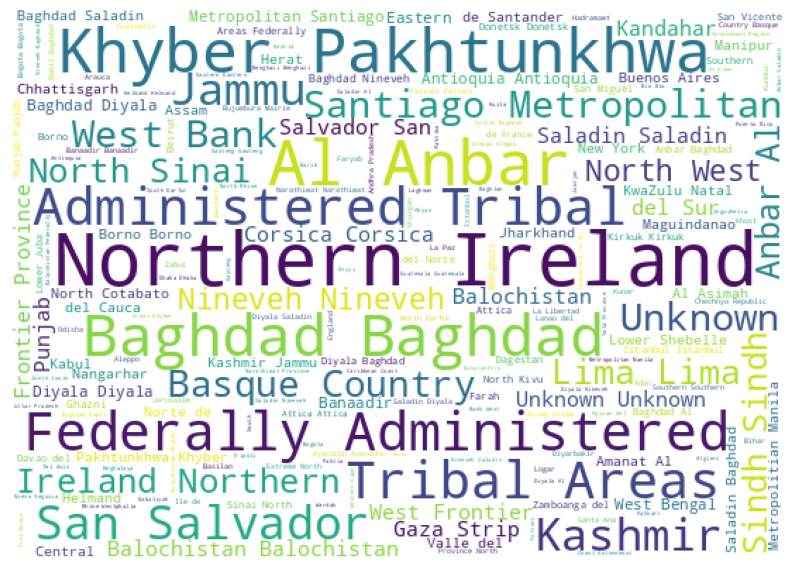

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 550,
                     height = 390).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

##Data visualization
people killed and wounded in each year

In [ ]:
b=df[["Year","Wounded"]].groupby("Year").sum()
b.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


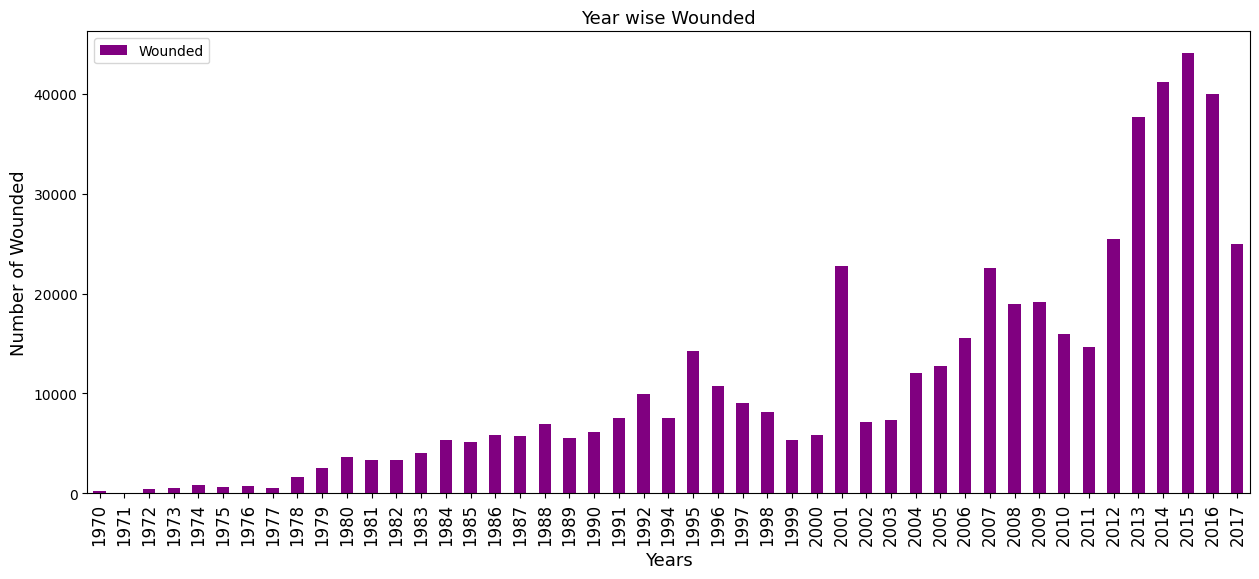

In [ ]:
b.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Year wise Wounded",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()

In [ ]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [ ]:
w=df[["Year","Wounded"]].groupby("Year").sum()
w.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Wounded')

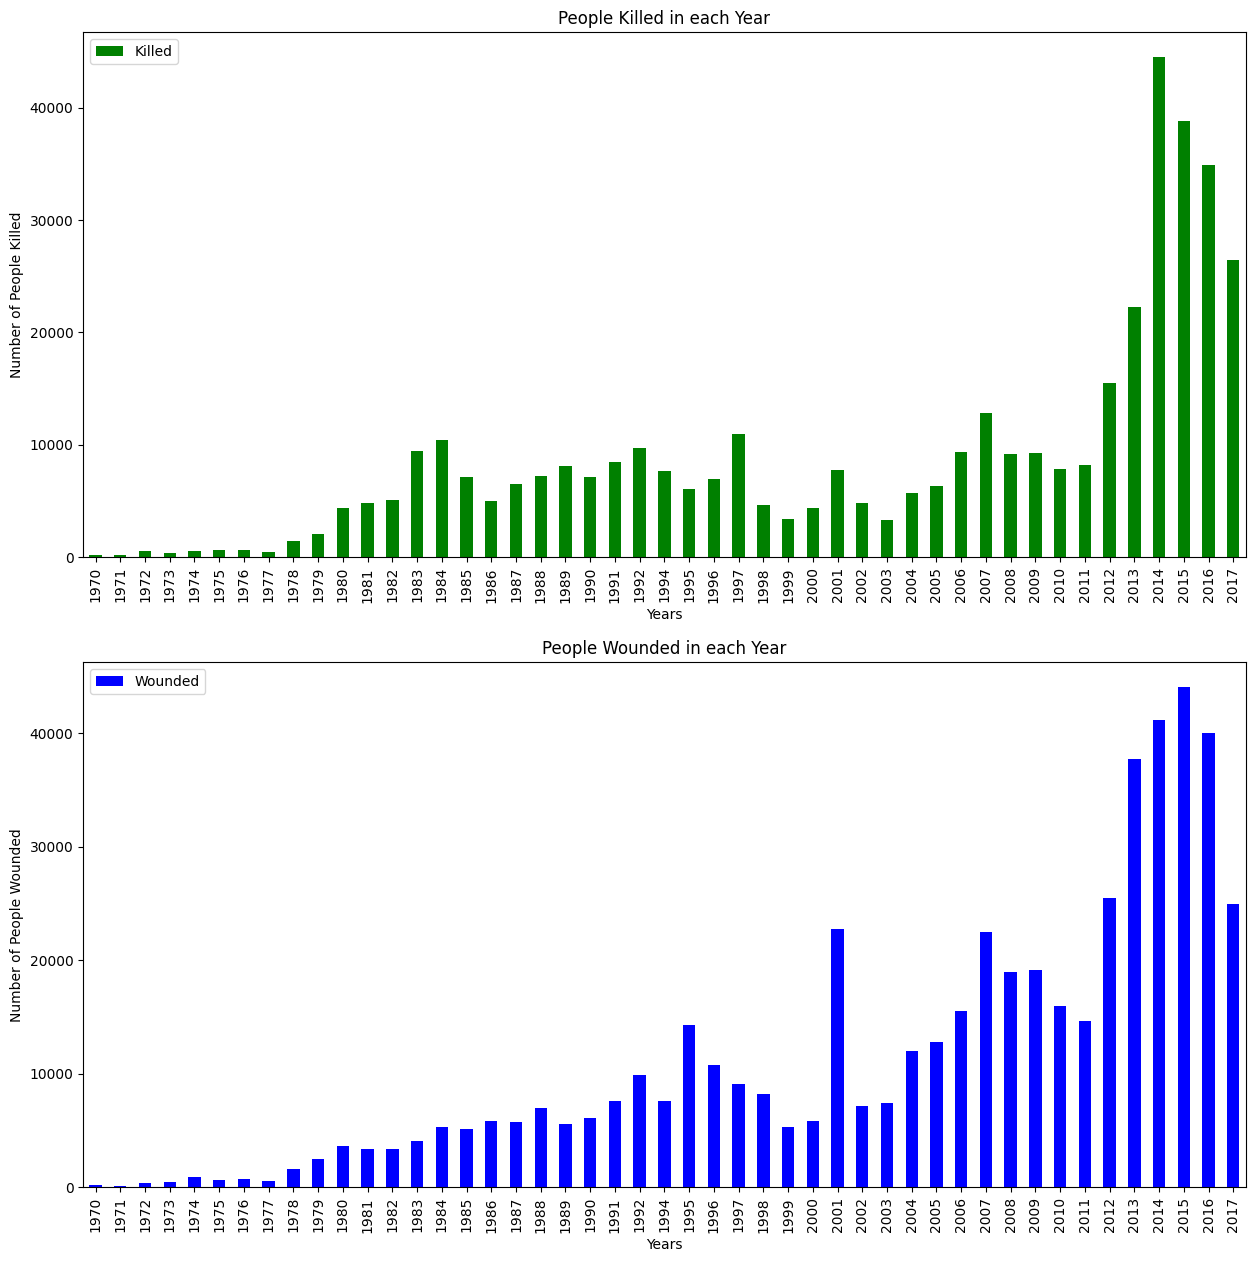

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k.plot(kind="bar",color="green",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
w.plot(kind="bar",color="blue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

##Number of Terrorist Activities each Year

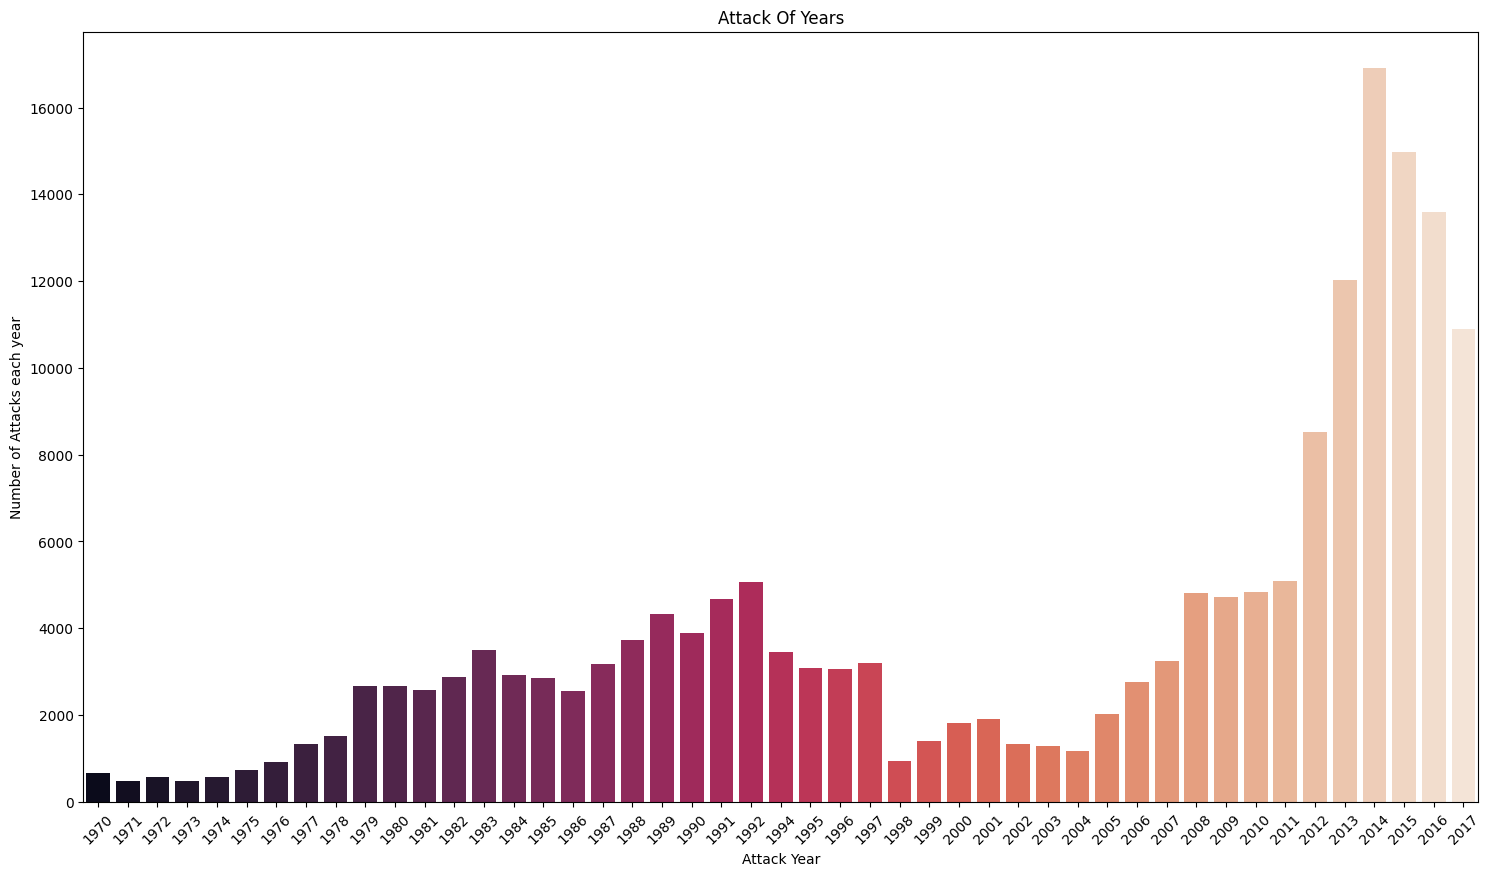

In [ ]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Of Years')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

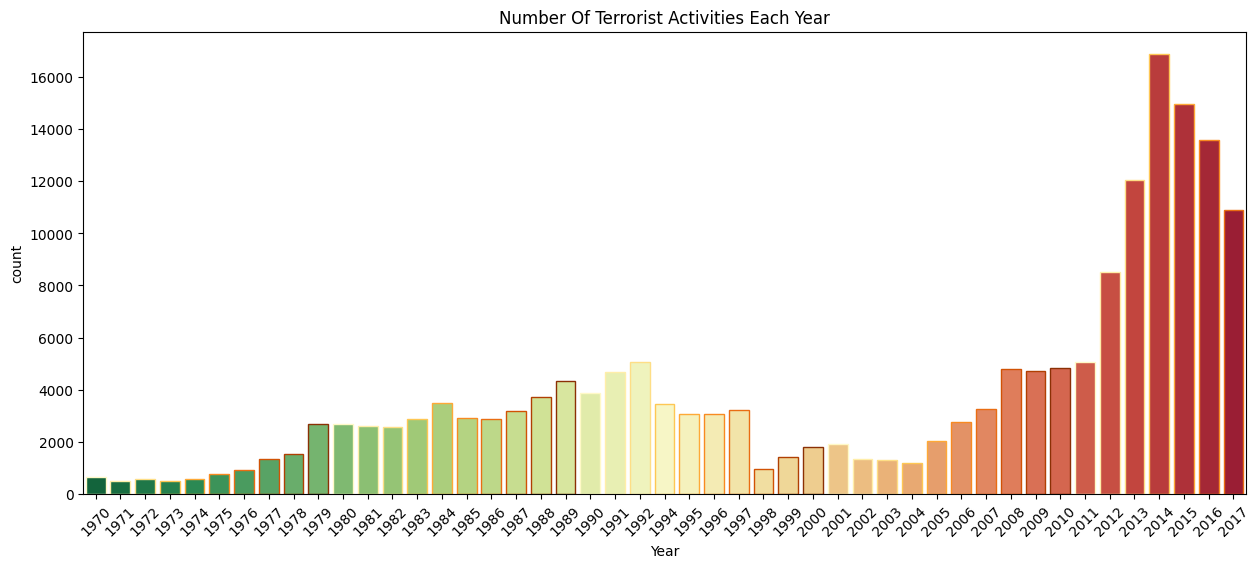

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')

##Terrorist Activities by Region in each Year through Area Plot

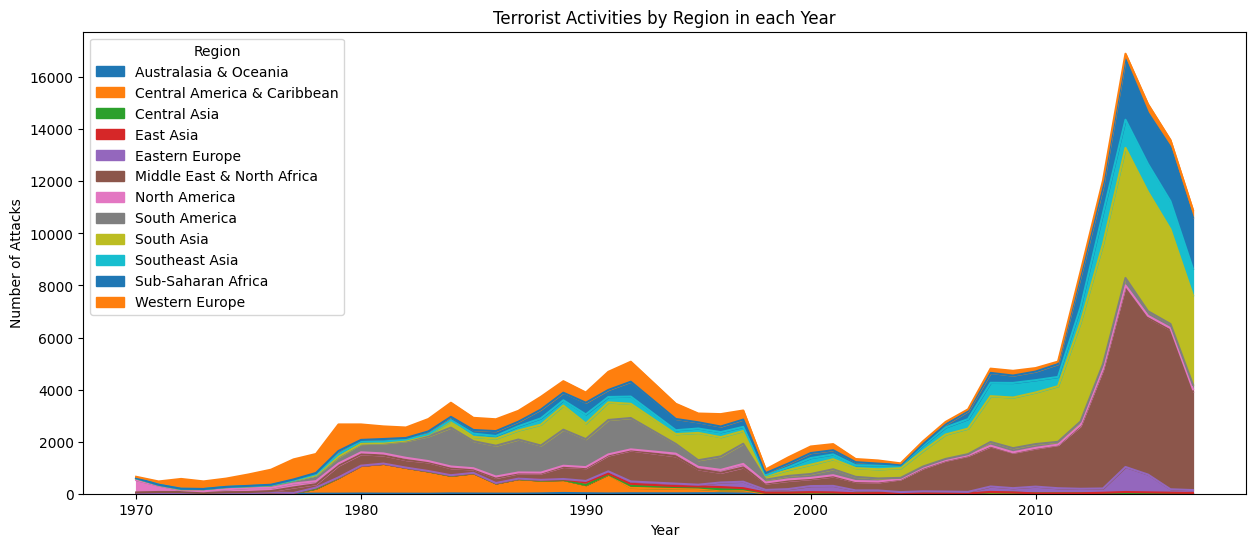

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

##Heatmap

In [ ]:
t1 = df.sort_values(by='casualities',ascending=False)[:40]
heat=t1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
a=regt["Total"].sort_values(ascending=False)
a

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

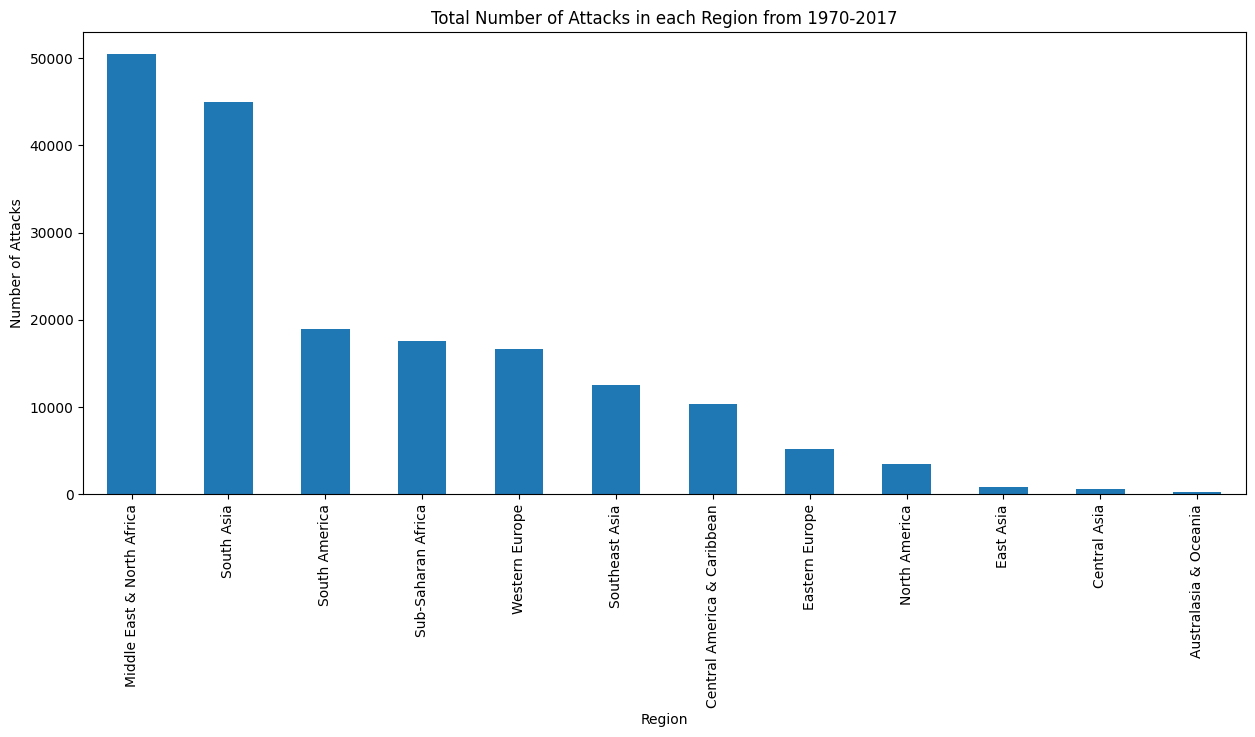

In [ ]:
a.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

##Top Countries affected by Terror Attacks

In [ ]:
df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

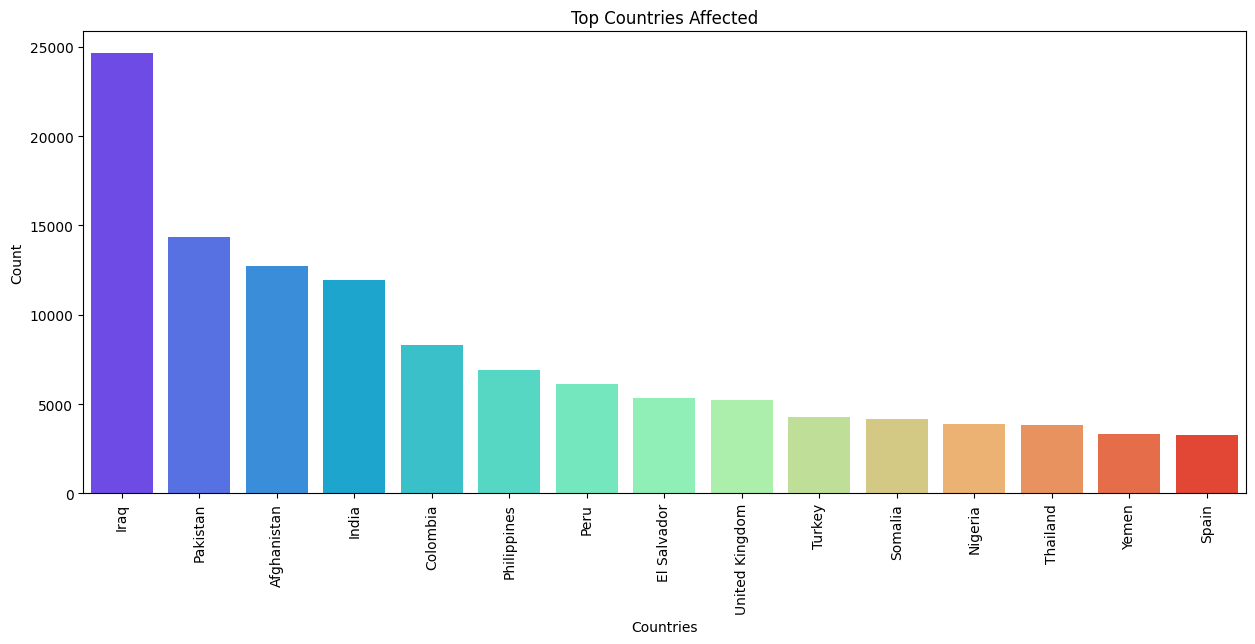

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
top_countries = df['Country'].value_counts()[:15]
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='rainbow')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


##Customized Data Analysis


Terrorist Attacks of a Particular year and their Locations

In [ ]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1974

In [ ]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In 1970, the American continent accounted for 84% of all terrorist attacks, while the Middle East and North Africa, which are now known as hotspots for conflicts and terrorism, experienced just one terrorist incident during that year.

##Types of terrorist attacks that cause deaths

In [ ]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [ ]:
# Let's look at what types of attacks these deaths were made of.
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Killed'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Killed'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['AttackType'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['Killed', 'AttackType'], **{'inner': 'stick'})
chart

In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


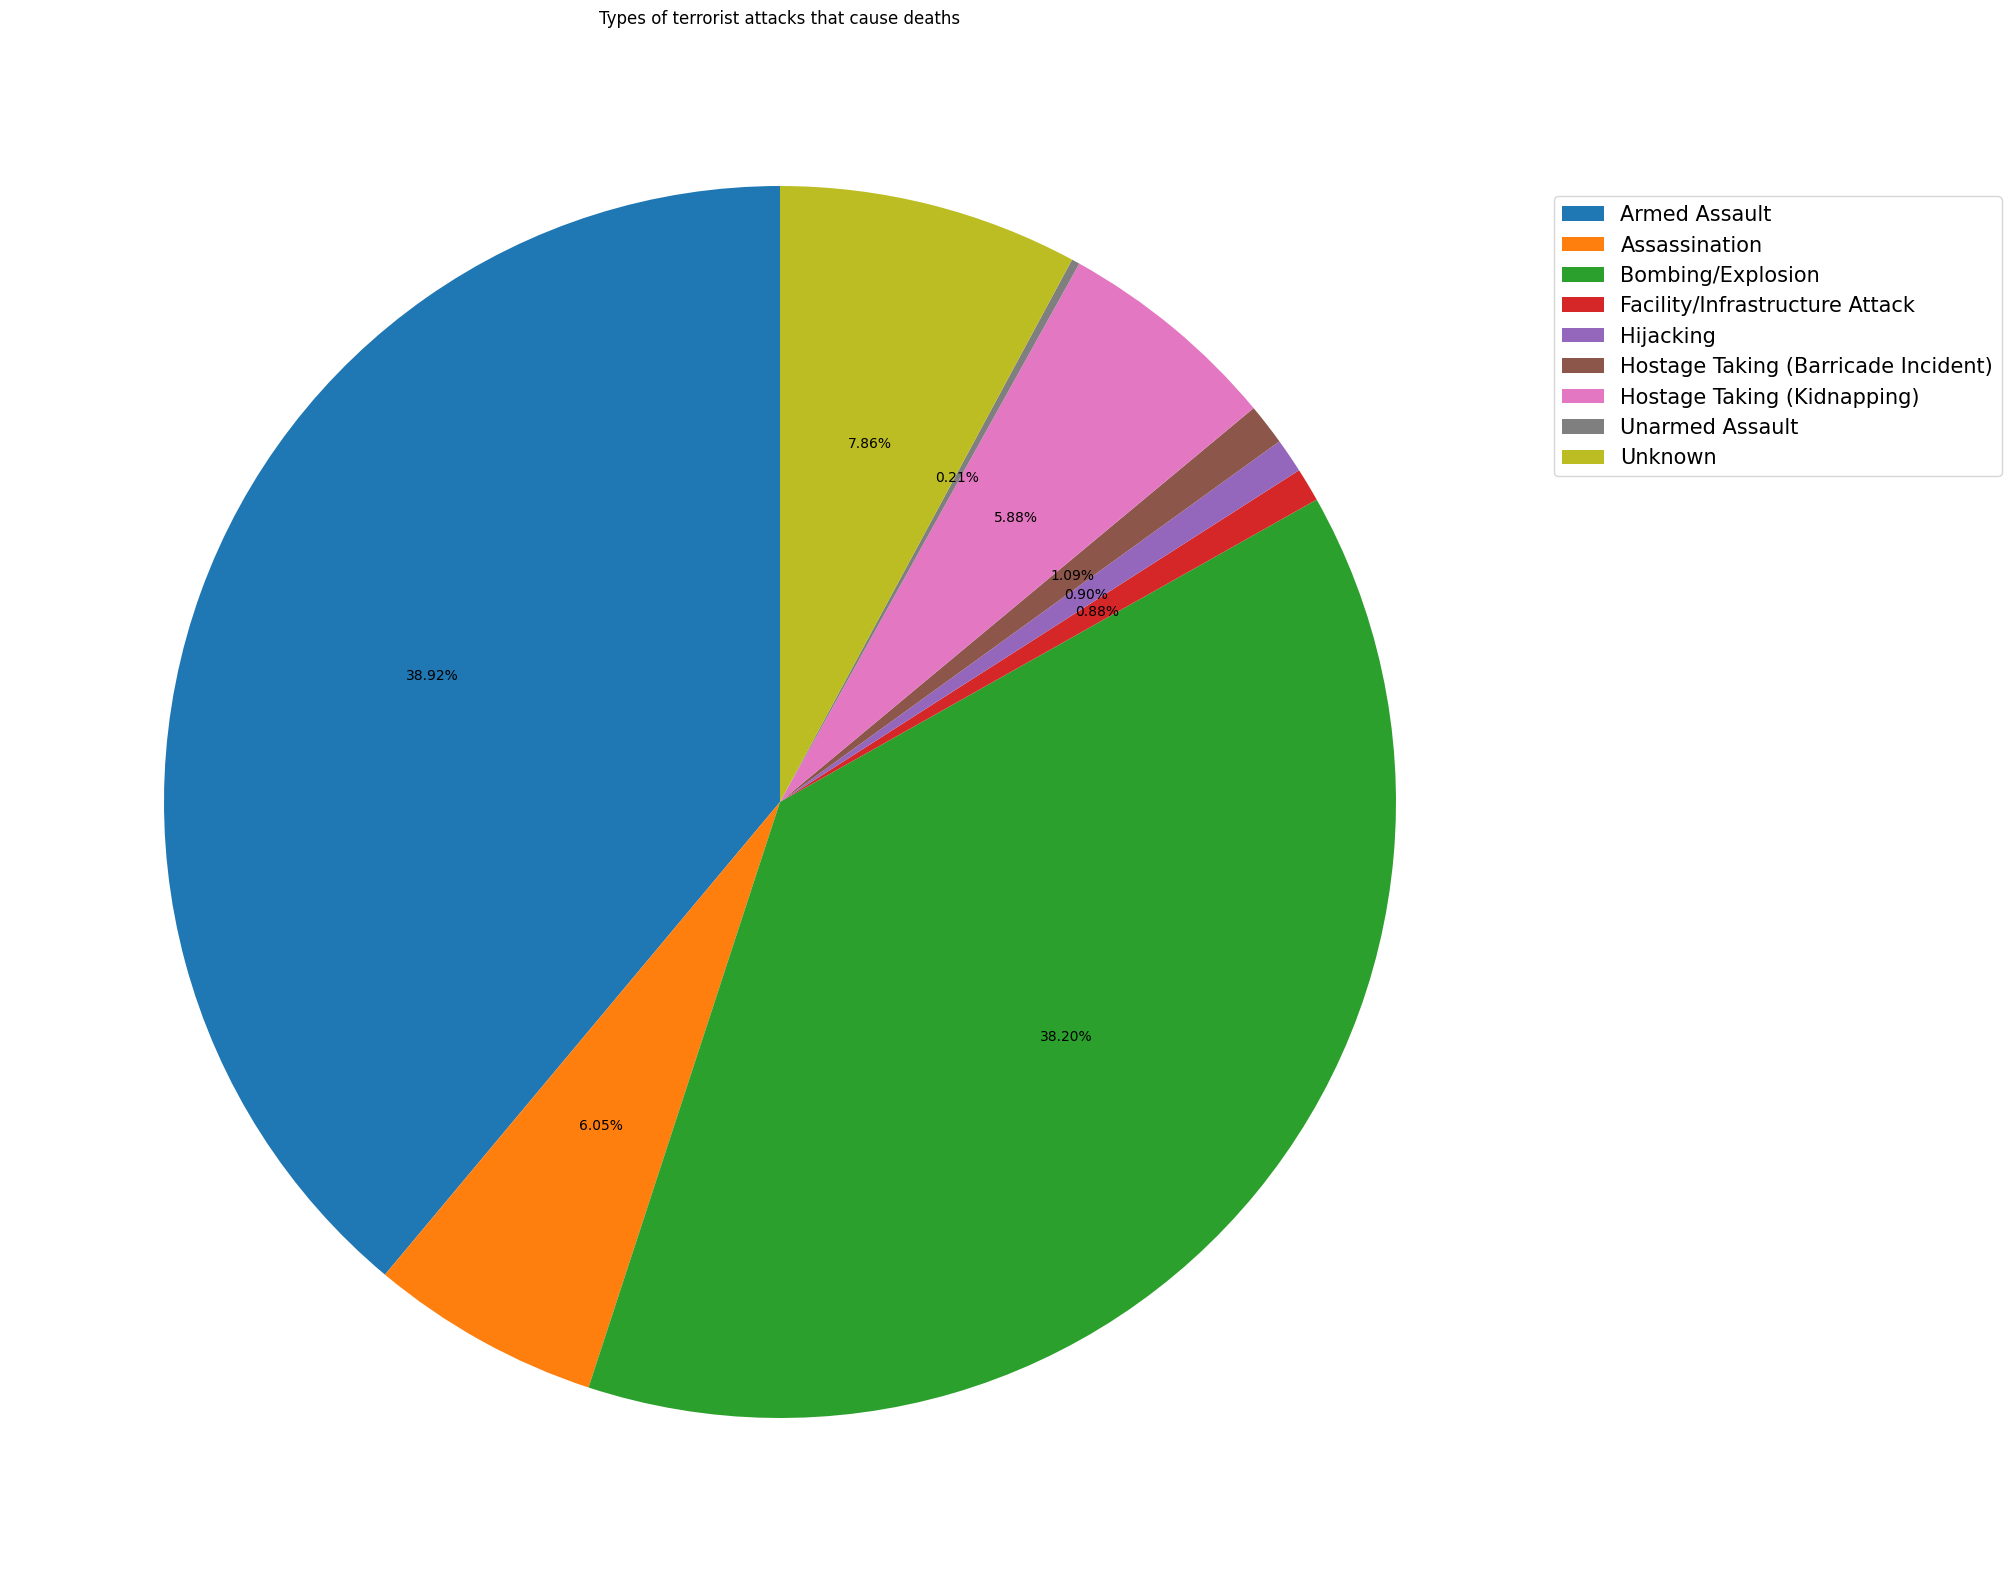

In [ ]:
import numpy as np

labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()

The combination of armed assaults and bombings/explosions accounts for a significant portion, specifically 77%, of the fatalities resulting from these attacks. This high fatality rate underscores the recurring use of these tactics in terrorist activities, highlighting the profound threat posed by weapons and explosives on a global scale.

##Number of People Killed in Terrorist Attacks (By Countries)

In [ ]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

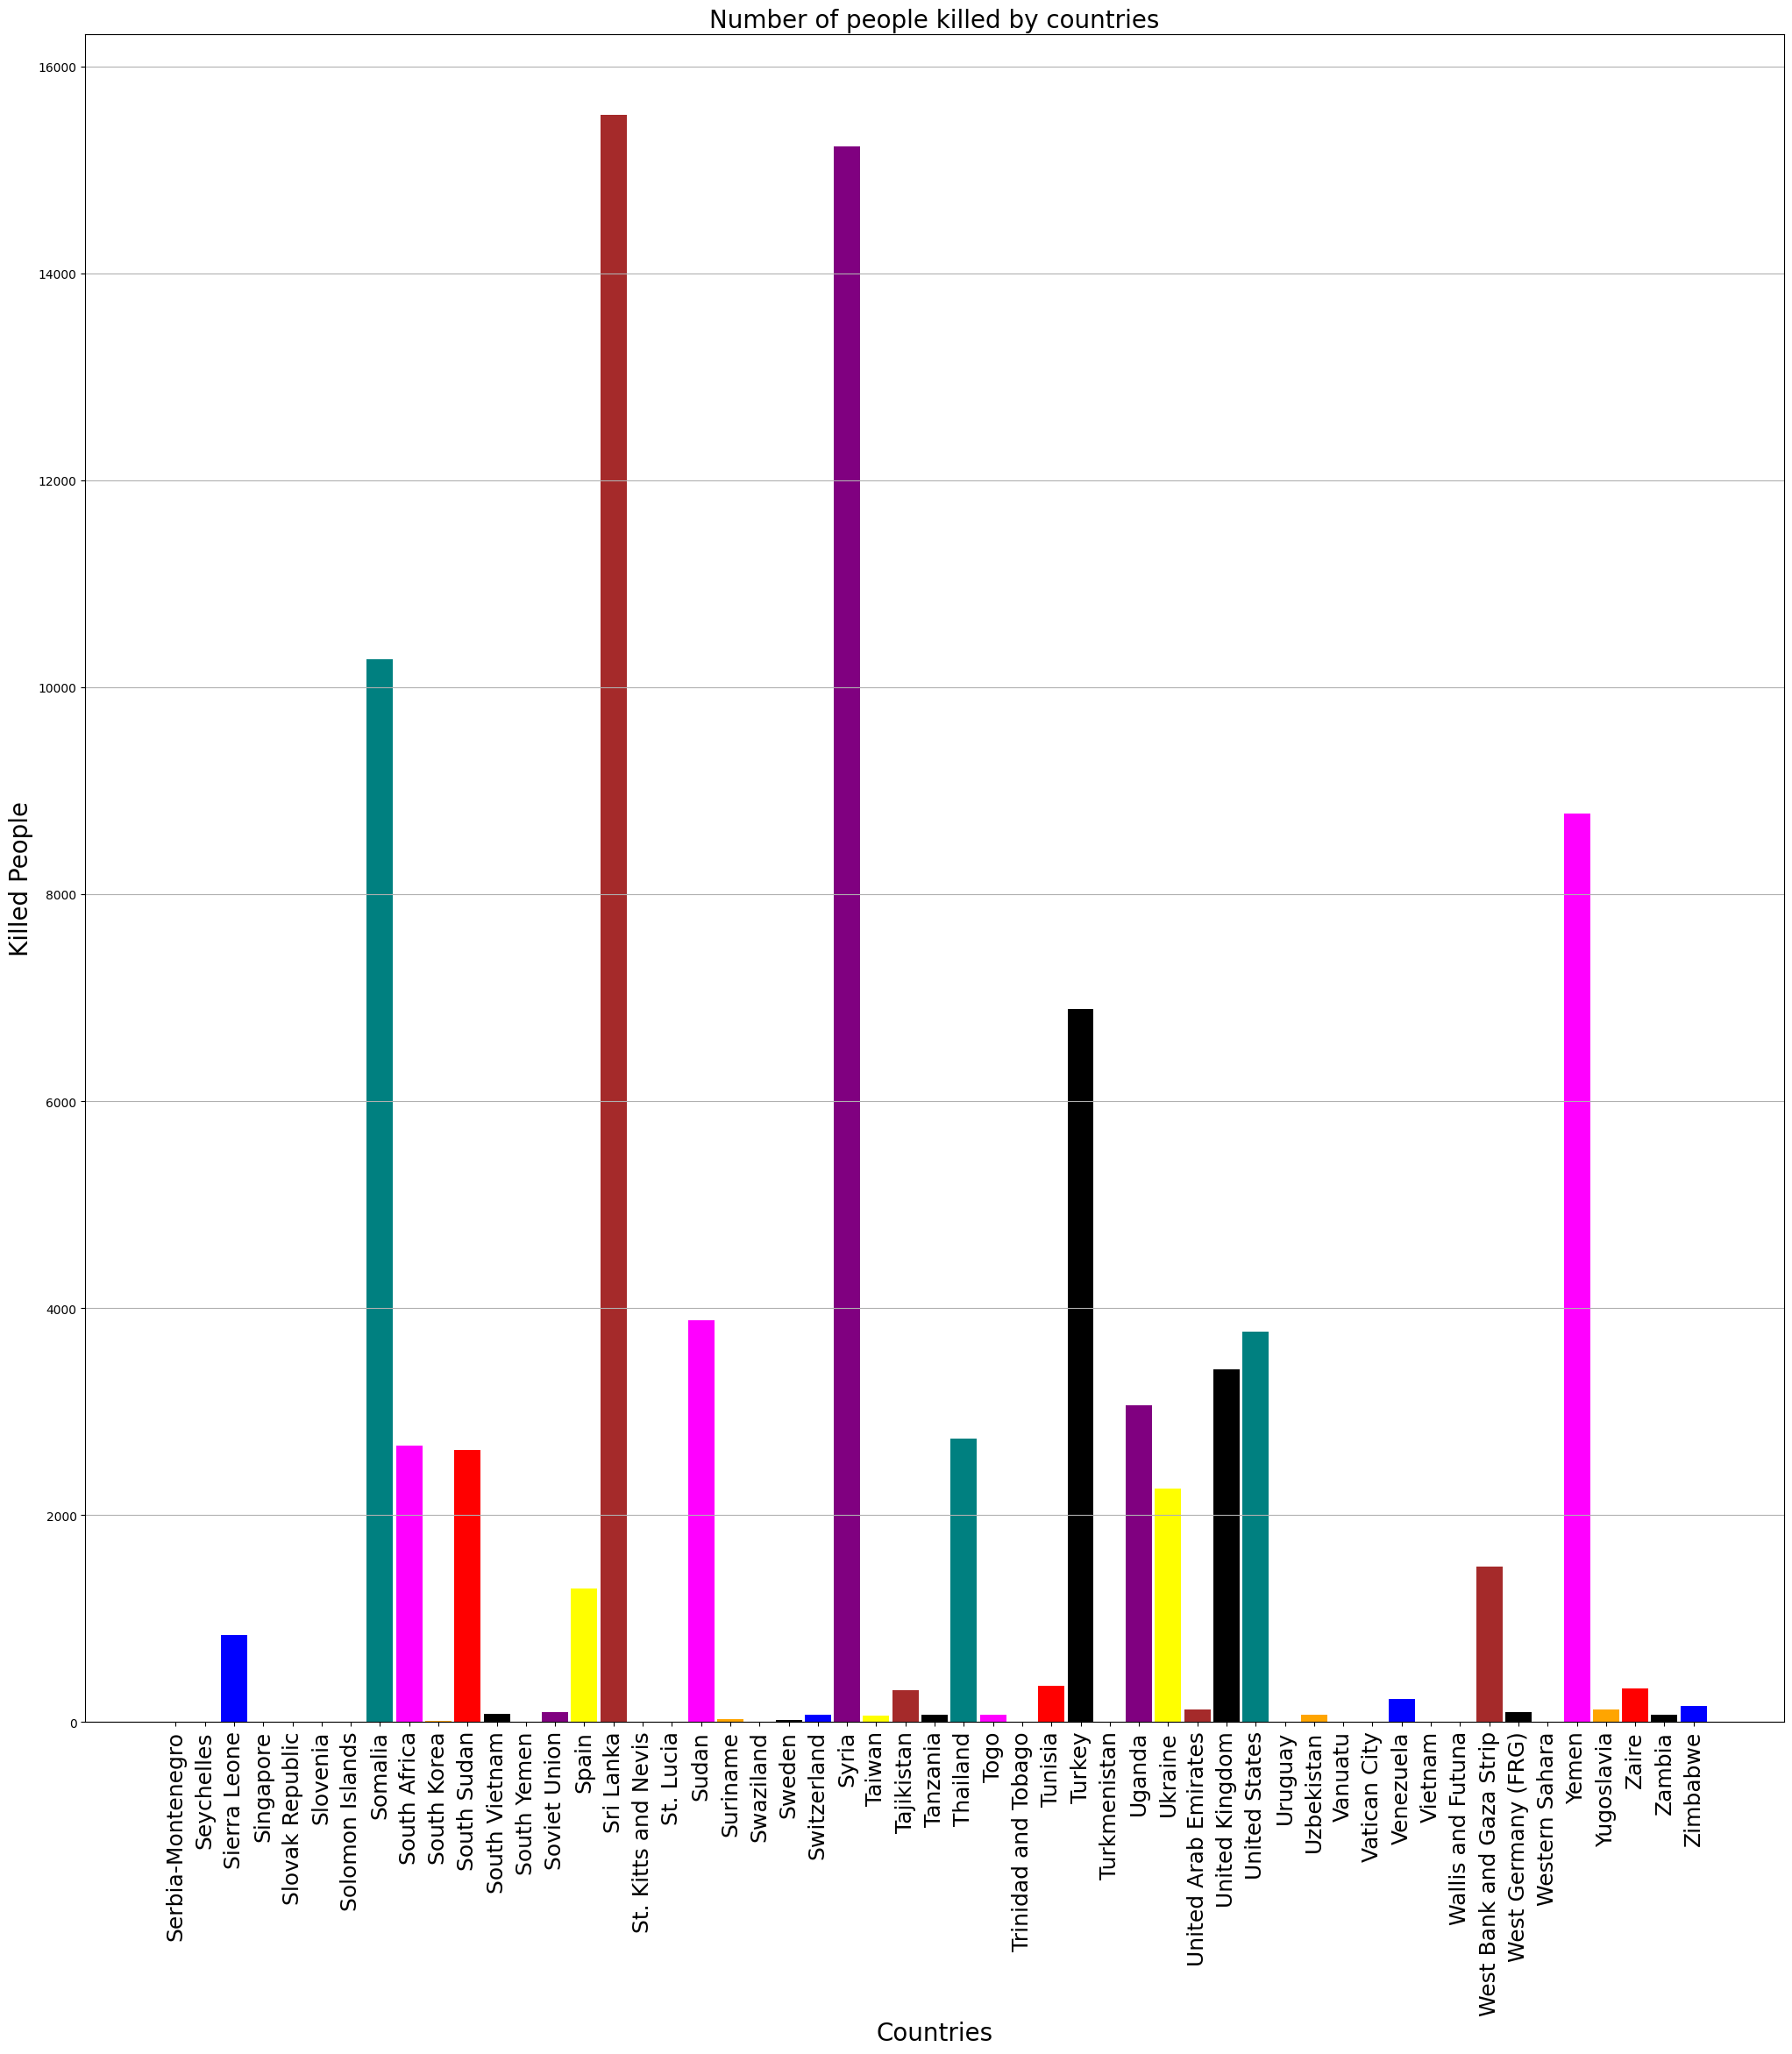

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'black', 'blue', 'purple', 'yellow', 'brown', 'black', 'teal', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

##Region Wise Casuality

In [ ]:
c=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
c

,Wounded
Region,
Middle East & North Africa,214308
South Asia,141360
Sub-Saharan Africa,52856
Southeast Asia,26259
North America,21531
Western Europe,18332
South America,16704
Eastern Europe,12045
East Asia,9213


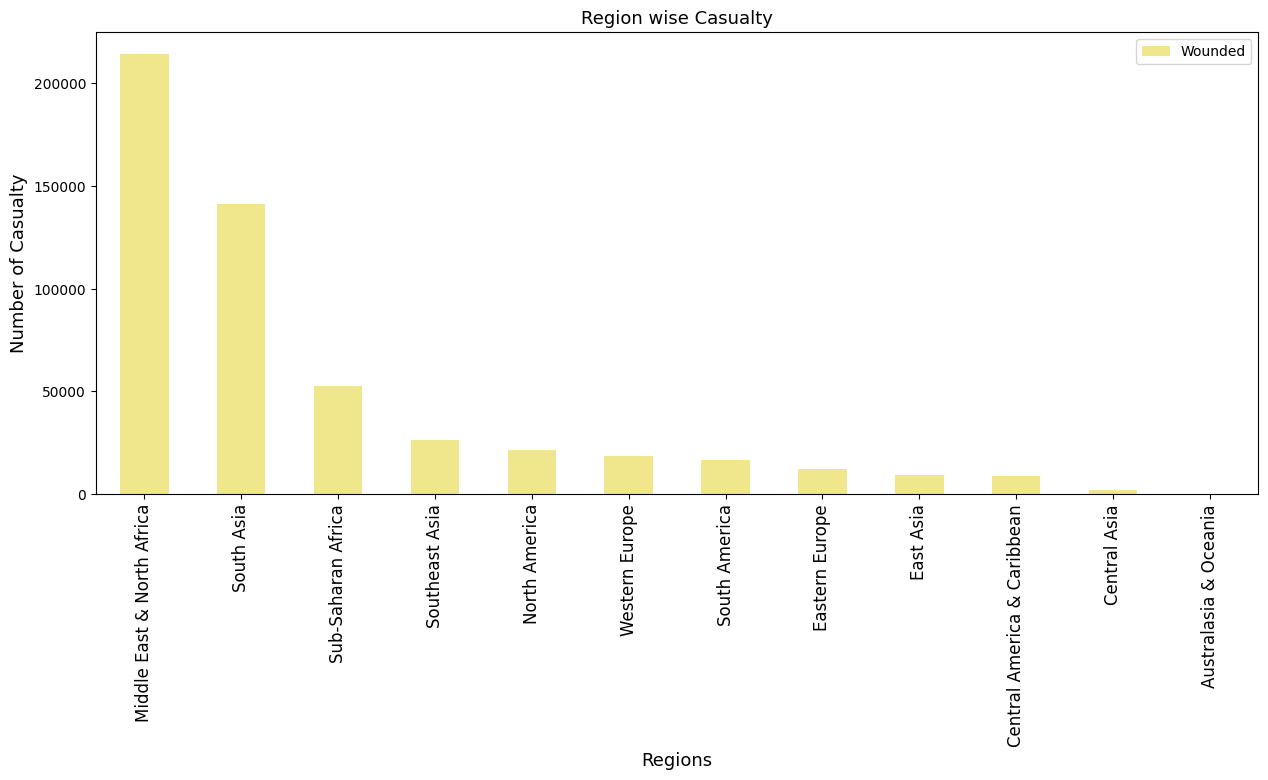

In [ ]:
c.plot(kind="bar",color="khaki",figsize=(15,6))
plt.title("Region wise Casualty",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualty",fontsize=13)
plt.show()

##People Killed and Wounded In Each Region

In [ ]:
k=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
k

,Killed
Region,
Middle East & North Africa,137642
South Asia,101319
Sub-Saharan Africa,78386
South America,28849
Central America & Caribbean,28708
Southeast Asia,15637
Eastern Europe,7415
Western Europe,6694
North America,4916


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(k, *['Killed'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(k, *['Killed'], **{})
chart

In [ ]:
w=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
w

,Wounded
Region,
Middle East & North Africa,214308
South Asia,141360
Sub-Saharan Africa,52856
Southeast Asia,26259
North America,21531
Western Europe,18332
South America,16704
Eastern Europe,12045
East Asia,9213


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(w, *['Wounded'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(w, *['Wounded'], **{})
chart

<function matplotlib.pyplot.show(close=None, block=None)>

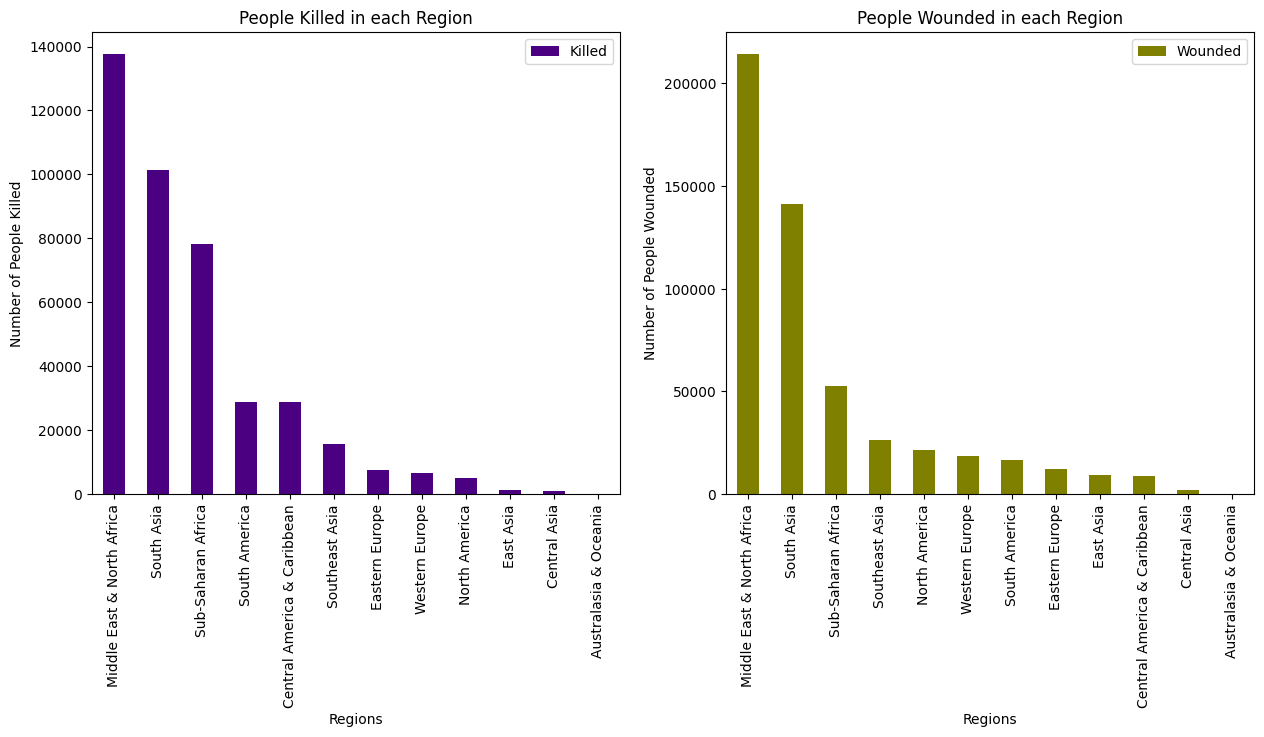

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
k.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
w.plot(kind="bar",color="olive",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show

##Conclusion
Terrorist incidents in the Middle East and Northern Africa region have been associated with severe and deadly outcomes. This region has been identified as a hotspot for significant terrorist attacks. Contrary to a common perception linking Muslims with terrorism, it is worth noting that Muslims are often the primary victims of these terrorist acts. A closer examination of the data visualizations reveals that Iraq, Afghanistan, and Pakistan are among the most adversely affected nations, and it's noteworthy that these countries are predominantly Muslim.